# Images in Matplotlib
---

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
img = mpimg.imread('./stinkbug.png')
print(img)

[[0.40784314 0.40784314 0.40784314 ... 0.42745098 0.42745098 0.42745098]
 [0.4117647  0.4117647  0.4117647  ... 0.42745098 0.42745098 0.42745098]
 [0.41960785 0.41568628 0.41568628 ... 0.43137255 0.43137255 0.43137255]
 ...
 [0.4392157  0.43529412 0.43137255 ... 0.45490196 0.4509804  0.4509804 ]
 [0.44313726 0.44313726 0.4392157  ... 0.4509804  0.44705883 0.44705883]
 [0.44313726 0.4509804  0.4509804  ... 0.44705883 0.44705883 0.44313726]]


In [4]:
img.shape

(375, 500)

In [5]:
# The first three pixels in the first three rows
img[:3, :3]

array([[0.40784314, 0.40784314, 0.40784314],
       [0.4117647 , 0.4117647 , 0.4117647 ],
       [0.41960785, 0.41568628, 0.41568628]], dtype=float32)

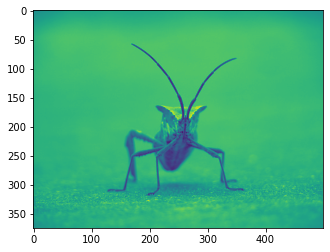

In [6]:
imgplot = plt.imshow(img)

## Let’s mess with this image 🤡
---

I want to manually change a few pixels to better understand the structure of the NumPy array `matplotlib.image.imread` returns.

In [7]:
img[:3, :3] = 1.0

I’m getting “`ValueError: assignment destination is read-only`”. Seems like I can’t mutate this array? Let’s get some info about the memory layout of this array:

In [8]:
img.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

`WRITEABLE` is `False`. Huh. That’s surely not the case for a regular vanilla NumPy array?

In [9]:
a = np.arange(0, 1000).reshape(10, 10, 10)
print(f"a.shape: {a.shape}")
print(f"a.flags['WRITEABLE']: {a.flags['WRITEABLE']}")

a.shape: (10, 10, 10)
a.flags['WRITEABLE']: True


Let’s make a copy of the image array, and see if that makes it `WRITEABLE`:

In [10]:
img_copy = img.copy()
img_copy.flags['WRITEABLE']

True

It does, great. Let’s proceed and **mess with the pixels!!!**

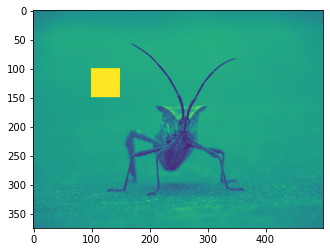

In [11]:
img_copy[100:150, 100:150] = 1.0
plt.imshow(img_copy)

It’s working!!! 💥🚀

## Apply pseudocolor schemes to image plots
---

We have a luminosity image, because our input image was a grayscale image.

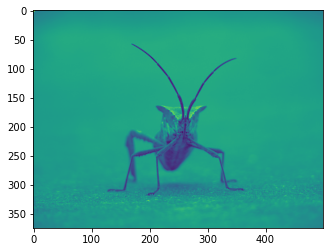

In [12]:
lum_img = img.copy()

plt.imshow(lum_img)

Change the colormap property `cmap` to change the appearance of our luminosity (2D, no color) image.

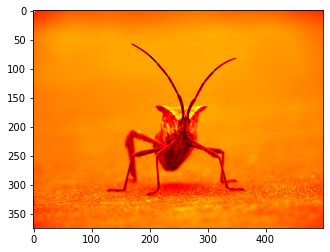

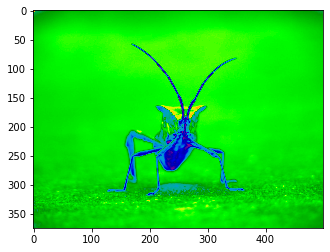

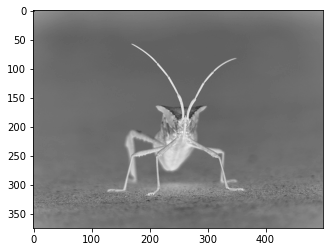

In [13]:
plt.imshow(lum_img, cmap="hot")
plt.show()
plt.imshow(lum_img, cmap="nipy_spectral")
plt.show()
plt.imshow(lum_img, cmap="binary")
plt.show()

We passed the `cmap` as an argument to `imshow` above. You can also `set_cmap` on an `AxesImage` object that gets returned by `imshow`:

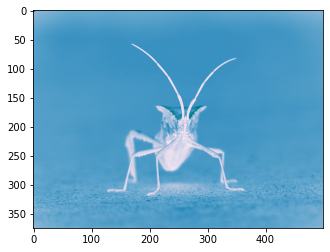

In [14]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('PuBuGn')

### Add a color scale reference
---

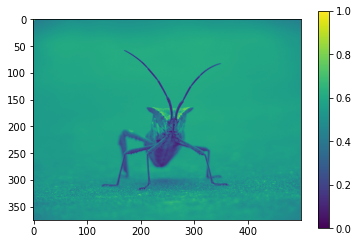

In [15]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

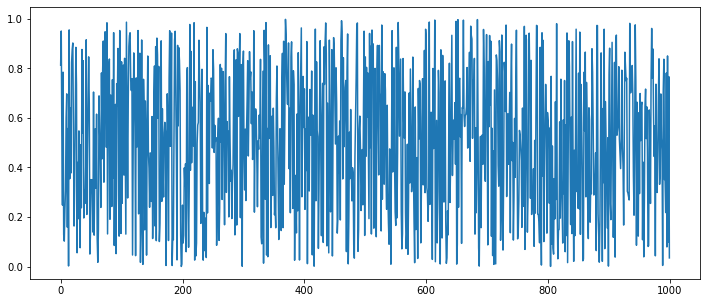

In [16]:
y = np.random.random(1000)
plt.figure(figsize=(12, 5))
plt.plot(y)

### Examining a specifc data range
---

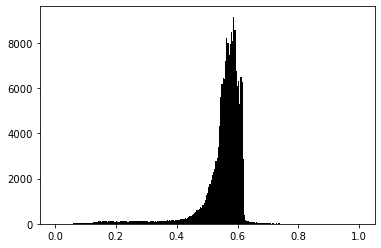

In [17]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), facecolor='k')
plt.show()

In [18]:
lum_img.shape

(375, 500)

In [19]:
lum_img.max()

1.0

In [20]:
lum_img.min()

0.0

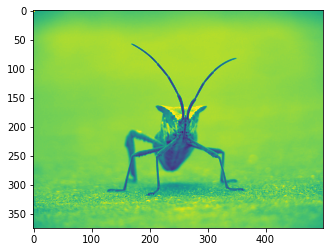

In [21]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

Let’s compare the two, with changed color limits on the right:

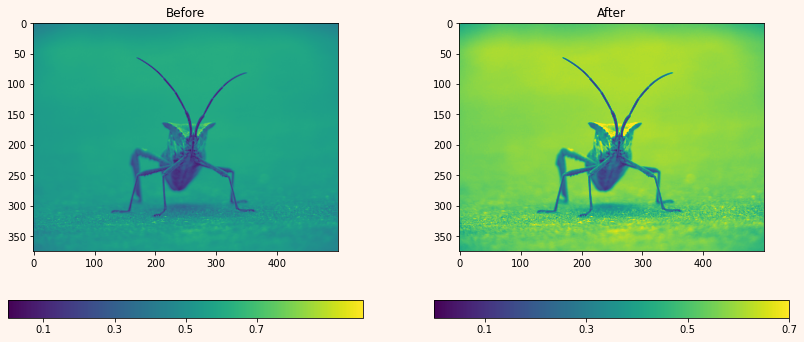

In [22]:
fig = plt.figure(figsize=(14, 6), facecolor='seashell')

ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
ax.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

## Array interpolation schemes
---

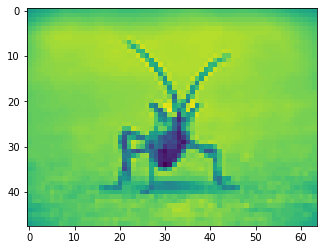

In [23]:
from PIL import Image

img = Image.open('./stinkbug.png')
img.thumbnail((64, 64), Image.ANTIALIAS)
imgplot = plt.imshow(img)

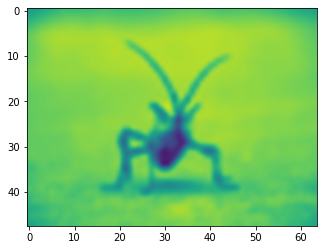

In [24]:
imgplot = plt.imshow(img, interpolation="bicubic")

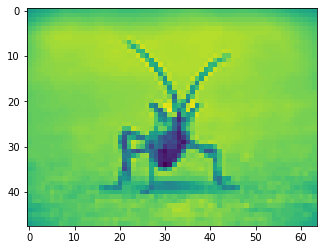

In [25]:
imgplot = plt.imshow(img, interpolation="nearest")